# Concept Activation Vectors (CAVs) example on CIFAR data
### Peter Xenopoulos

In this workbook, we will go over how to use CAVs on some popular image data -- the CIFAR datasets.

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from keras.datasets import cifar100, fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import sys
import os
sys.path.insert(0, os.path.abspath('../..'))

from cav.cav import *

np.random.seed(1996)

First we must import some images from CIFAR-10. We will import the _ships_ and the _dog_ images.

In [152]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Keep airplanes (5) and ships (8) from CIFAR-10
women = y_train == [98]
men = y_train == [46]
indices = women + men
indx_to_use = [i for i, x in enumerate(indices) if x]

x_train = x_train[indx_to_use]
y_train = y_train[indx_to_use]

y_train = (y_train == 46).astype(int)
y_train = np.concatenate(y_train).ravel().tolist()

Below is an example of some of the images

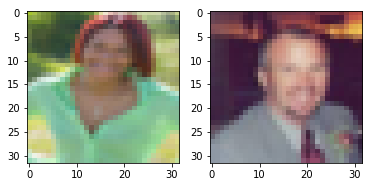

In [153]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(x_train[0])
axarr[1].imshow(x_train[2])

Next, we must specify a _concept_. This is a certain idea we want to capture from our pictures. Let's say we are interested in the concept of the _sea_. Let's load in CIFAR-100 to get some pictures of the sea and some random counterexample, which we'll just make apples for ease of use.

In [154]:
(x_train_concept, y_train_concept), (x_test_concept, y_test_concept) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [176]:
y_train_concept[776]

6

In [163]:
i = y_train_concept == 4
x_train_concept[i]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 60000

In [ ]:
y_train = (y_train == 46).astype(int)

In [149]:
from keras.datasets import cifar10
import cv2
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

data_upscaled = np.zeros((50000, 3, 227, 227))
for i, img in enumerate(X_train):
    im = img.reshape((1, 2, 0))
    large_img = cv2.resize(im, dsize=(227, 227), interpolation=cv2.INTER_CUBIC)
    data_upscaled[i] = large_img.reshape((2, 0, 1))

array([[[165, 197,  45],
        [164, 190,  68],
        [139, 163,  71],
        ...,
        [161, 171, 140],
        [168, 177, 130],
        [196, 206, 142]],

       [[138, 167,  65],
        [144, 168,  76],
        [132, 155,  64],
        ...,
        [124, 140, 119],
        [121, 138, 106],
        [148, 169, 110]],

       [[104, 133,  53],
        [106, 134,  43],
        [106, 133,  43],
        ...,
        [109, 132, 105],
        [ 90, 111,  97],
        [104, 128, 103]],

       ...,

       [[210, 226, 185],
        [208, 206, 143],
        [212, 207, 139],
        ...,
        [206, 207, 101],
        [207, 204, 105],
        [209, 208, 124]],

       [[201, 235, 214],
        [236, 243, 230],
        [240, 236, 220],
        ...,
        [197, 199,  95],
        [198, 198,  97],
        [211, 210, 135]],

       [[152, 218, 185],
        [176, 227, 199],
        [204, 239, 218],
        ...,
        [198, 194, 118],
        [203, 207, 128],
        [195, 224, 157]]

In [148]:
from PIL import Image

img = x_train_concept[0]
img = img.resize((32,32), Image.ANTIALIAS)

TypeError: 'tuple' object cannot be interpreted as an integer

In [143]:
(x_train_concept, y_train_concept), (x_test_concept, y_test_concept) = cifar100.load_data()

# keep sea (54) from CIFAR-100
other = y_train_concept == [98]
concept = y_train_concept == [46]
indices = other + concept
indx_to_use = [i for i, x in enumerate(indices) if x]

x_train_concept = x_train_concept[indx_to_use]
y_train_concept = y_train_concept[indx_to_use]
y_train_concept = (y_train_concept == 46).astype(int)
y_train_concept = np.concatenate(y_train_concept).ravel().tolist()

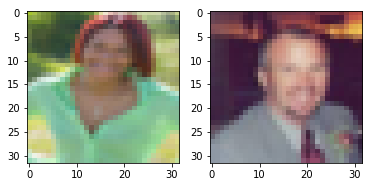

In [144]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(x_train_concept[0])
axarr[1].imshow(x_train_concept[2])

Now, we must train our initial model. We do so below.

In [109]:
# Set parameters
batch_size = 32
epochs = 2

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# initiate optimizer
opt = keras.optimizers.Adam(lr=0.001)

# train the model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True)

Epoch 1/2
10000/10000 [==============================] - 26s 3ms/step - loss: 0.2436 - acc: 0.8977
Epoch 2/2
10000/10000 [==============================] - 25s 3ms/step - loss: 0.1360 - acc: 0.9524


In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)        18496     
__________

First, we split our model on a given layer. We can see that the last convolution layer is layer 8, but in order for our method to work, we need to include the activations and pooling and flattening. So, we will split on layer 12. Then, we train a binary classifier on our concepts. This will produce our concept activation vector.

In [114]:
model_f, model_h = return_split_models(model, 12)
cav_vec = train_cav(model_f, x_train_concept, y_train_concept)

Epoch 1/2
1000/1000 [==============================] - 0s 415us/step - loss: 0.4846 - acc: 0.9270
Epoch 2/2
1000/1000 [==============================] - 0s 30us/step - loss: 0.2288 - acc: 0.9680


Below we see the concept activation vector

In [115]:
cav_vec

array([[ 0.01295851],
       [-0.04152356],
       [ 0.05301687],
       ...,
       [ 0.01678233],
       [ 0.0073557 ],
       [ 0.00991324]], dtype=float32)

Now, for each original training example, we calculate the sensitivity to the concept using our `cav_vec`

In [117]:
sensitivities = conceptual_sensitivity(x_train, model_f, model_h, cav_vec)

In [119]:
sensitivities

array([[1.3016066e-06],
       [4.6889298e-03],
       [9.7698113e-03],
       ...,
       [1.7226775e-01],
       [2.6039355e-05],
       [1.0634409e-01]], dtype=float32)

In [84]:
model_f, model_h = return_split_models(model, 12)
concept_cav = train_cav(model_f, x_train_concept, y_train_concept)
unique_labels = np.unique(y_train)
tcav = []

Epoch 1/20
1000/1000 [==============================] - 0s 361us/step - loss: 0.8434 - acc: 0.9020
Epoch 2/20
1000/1000 [==============================] - 0s 35us/step - loss: 0.3262 - acc: 0.9600
Epoch 3/20
1000/1000 [==============================] - 0s 34us/step - loss: 0.1888 - acc: 0.9730
Epoch 4/20
1000/1000 [==============================] - 0s 40us/step - loss: 0.1325 - acc: 0.9800
Epoch 5/20
1000/1000 [==============================] - 0s 35us/step - loss: 0.1107 - acc: 0.9800
Epoch 6/20
1000/1000 [==============================] - 0s 34us/step - loss: 0.0884 - acc: 0.9790
Epoch 7/20
1000/1000 [==============================] - 0s 43us/step - loss: 0.0785 - acc: 0.9790
Epoch 8/20
1000/1000 [==============================] - 0s 48us/step - loss: 0.0421 - acc: 0.9900
Epoch 9/20
1000/1000 [==============================] - 0s 43us/step - loss: 0.0242 - acc: 0.9920
Epoch 10/20
1000/1000 [==============================] - 0s 42us/step - loss: 0.0142 - acc: 0.9950
Epoch 11/20
1000/1

In [98]:
training_subset[0].shape

(32, 32, 3)

In [130]:
training_subset[0:1].shape
conceptual_sensitivity(training_subset[0:1], model_f, model_h, cav_vec)

array([[1.3016067e-06]], dtype=float32)

In [120]:
training_subset = x_train[np.array(y_train) == 1]
set_size = training_subset.shape[0]
count_of_sensitivity = 0
for example in training_subset:
    #sensitivity = conceptual_sensitivity(example, model_f, model_h, concept_cav)
    #print(sensitivity)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32,

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32,

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32,

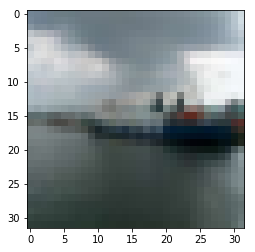

In [95]:
plt.imshow(training_subset[7])

In [85]:
for label in unique_labels:
    training_subset = x_train[np.array(y_train) == 1]
    set_size = training_subset.shape[0]
    count_of_sensitivity = 0
    for example in training_subset:
        sensitivity = conceptual_sensitivity(example, model_f, model_h, concept_cav)
        if sensitivity > 0:
            count_of_sensitivity = count_of_sensitivity + 1
    tcav.append(count_of_sensitivity/set_size)

ValueError: Error when checking input: expected conv2d_5_input to have 4 dimensions, but got array with shape (32, 32, 3)

# below is test

In [2]:
# Set parameters
batch_size = 32
epochs = 3

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Keep airplanes (0) and ships (8) from CIFAR-10
airplanes = y_train == [0]
ships = y_train == [8]
indices = airplanes + ships
indx_to_use = [i for i, x in enumerate(indices) if x]

x_train = x_train[indx_to_use]
y_train = y_train[indx_to_use]

y_train = (y_train == 8).astype(int)
y_train = np.concatenate(y_train).ravel().tolist()

# Ships are now 1, airplanes are 0

# keep cloud (50) and sea (54) from CIFAR-100
(x_train_concept, y_train_concept), (x_test_concept, y_test_concept) = cifar100.load_data()

other = y_train_concept == [47]
concept = y_train_concept == [54]
indices = other + concept
indx_to_use = [i for i, x in enumerate(indices) if x]

x_train_concept = x_train_concept[indx_to_use]
y_train_concept = y_train_concept[indx_to_use]
y_train_concept = (y_train_concept == 54).astype(int)
y_train_concept = np.concatenate(y_train_concept).ravel().tolist()
# Sea is now 1, clouds are 0

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# initiate optimizer
opt = keras.optimizers.Adam(lr=0.001)

# train the model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True)

Epoch 1/3
10000/10000 [==============================] - 30s 3ms/step - loss: 0.5800 - acc: 0.6929
Epoch 2/3
10000/10000 [==============================] - 31s 3ms/step - loss: 0.4200 - acc: 0.8116
Epoch 3/3
10000/10000 [==============================] - 31s 3ms/step - loss: 0.3319 - acc: 0.8581


In [5]:
''' Utilities for concept activation vectors '''
import numpy as np

from keras import backend as k
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.optimizers import Adam

def return_split_models(model, layer):
    ''' Split a model into model_f and model_h

    Parameters
    ----------
    model : (keras.engine.sequential.Sequential)
        Keras sequential model to split
    layer : (int)
        Integer specifying layer to split model on

    Returns
    -------
    model_f : (keras.engine.sequential.Sequential)
        Keras sequential model that is the first part
    model_h : (keras.engine.sequential.Sequential)
        Keras sequential model that is the second part
    '''
    model_f, model_h = Sequential(), Sequential()
    for current_layer in range(0, layer+1):
        model_f.add(model.layers[current_layer])
    # Write input layer for model_h
    model_h.add(InputLayer(input_shape=model.layers[layer+1].input_shape[1:]))
    for current_layer in range(layer+1, len(model.layers)):
        model_h.add(model.layers[current_layer])
    return model_f, model_h

def train_cav(model_f, x_concept, y_concept):
    ''' Return the concept activation vector for the concept

    Parameters
    ----------
    model_f : (keras.engine.sequential.Sequential)
        First Keras sequential model from return_split_models()
    x_concept : (numpy.ndarray)
        Training data for concept set, has same size as model training data
    y_concept : (numpy.ndarray)
        Labels for concept set, has same size as model training labels

    Returns
    -------
    cav : (numpy.ndarray)
        Concept activation vector
    '''
    concept_activations = model_f.predict(x_concept)
    binary_classifier = Sequential()
    binary_classifier.add(Dense(1, input_shape=concept_activations.shape[1:], activation='sigmoid'))
    binary_classifier.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    binary_classifier.fit(concept_activations, y_concept, batch_size=32, epochs=20, shuffle=True)
    cav = binary_classifier.layers[0].get_weights()[0]
    return cav

def conceptual_sensitivity(example, model_f, model_h, concept_cav):
    ''' Return the conceptual conceptual sensitivity for a given example

    Parameters
    ----------
    example : (numpy.ndarray)
        Example to calculate the concept sensitivity (be sure to reshape)
    model_f : (keras.engine.sequential.Sequential)
        First Keras sequential model from return_split_models()
    model_h : (keras.engine.sequential.Sequential)
        Second Keras sequential model from return_split_models()
    concept_cav : (numpy.ndarray)
        Numpy array with the linear concept activation vector for a given concept

    Returns
    -------
    sensitivity : (float32)
        Sensitivity for inputted examples
    '''
    example = np.expand_dims(example, axis = 0)
    model_f_activations = model_f.predict(example)[0]
    model_f_activations.shape = (1, model_h.input_shape[1])
    gradients = k.gradients(model_h.output, model_h.input)
    gradient_func = k.function([model_h.input], gradients)
    calc_grad = gradient_func([model_f_activations])[0]
    sensitivity = np.dot(calc_grad, concept_cav)
    return sensitivity


In [6]:
model_f, model_h = return_split_models(model, 12)
cav_vec = train_cav(model_f, x_train_concept, y_train_concept)

Epoch 1/20
1000/1000 [==============================] - 0s 193us/step - loss: 2.9566 - acc: 0.6460
Epoch 2/20
1000/1000 [==============================] - 0s 24us/step - loss: 1.1557 - acc: 0.8280
Epoch 3/20
1000/1000 [==============================] - 0s 31us/step - loss: 0.7798 - acc: 0.8650
Epoch 4/20
1000/1000 [==============================] - 0s 32us/step - loss: 0.5377 - acc: 0.8930
Epoch 5/20
1000/1000 [==============================] - 0s 31us/step - loss: 0.4439 - acc: 0.9040
Epoch 6/20
1000/1000 [==============================] - 0s 29us/step - loss: 0.3437 - acc: 0.9250
Epoch 7/20
1000/1000 [==============================] - 0s 29us/step - loss: 0.2405 - acc: 0.9410
Epoch 8/20
1000/1000 [==============================] - 0s 30us/step - loss: 0.2710 - acc: 0.9370
Epoch 9/20
1000/1000 [==============================] - 0s 34us/step - loss: 0.1787 - acc: 0.9630
Epoch 10/20
1000/1000 [==============================] - 0s 32us/step - loss: 0.1548 - acc: 0.9730
Epoch 11/20
1000/1

In [7]:
model_f_activations = model_f.predict(x_train)

In [8]:
gradients = k.gradients(model_h.output, model_h.input)
gradient_func = k.function([model_h.input], gradients)

In [10]:
calc_grad = gradient_func([model_f_activations])

In [14]:
calc_grad = gradient_func([model_f_activations])[0]

In [17]:
x = np.dot(calc_grad, cav_vec)

0.1216892

In [20]:
def tcav_score(x_train, y_train, model, layer, x_concept, y_concept):
    ''' Returns the TCAV score for the training data to a given concept

    Parameters
    ----------
    x_train : (numpy.ndarray)
        Training data where the i-th entry as x_train[i] is one example
    y_train : (numpy.ndarray)
        Training labels where the i-th entry as y_train[i] is one example
    model : (keras.engine.sequential.Sequential)
        Trained model to use
    layer : (int)
        Integer specifying layer to split model on
    x_concept : (numpy.ndarray)
        Training data for concept set, has same size as model training data
    y_concept : (numpy.ndarray)
        Labels for concept set, has same size as model training labels

    Returns
    -------
    tcav : (list)
        TCAV score for given concept and class
    '''
    model_f, model_h = return_split_models(model, layer)
    concept_cav = train_cav(model_f, x_concept, y_concept)
    unique_labels = np.unique(y_train)
    tcav = []
    for label in unique_labels:
        training_subset = x_train[np.array(y_train) == 1]
        set_size = training_subset.shape[0]
        count_of_sensitivity = 0
        for example in training_subset:
            sensitivity = conceptual_sensitivity(example, model_f, model_h, concept_cav)
            print(sensitivity)
            if sensitivity > 0:
                count_of_sensitivity = count_of_sensitivity + 1
        tcav.append(count_of_sensitivity/set_size)
    return tcav
    

In [ ]:
tcav_score(x_train, y_train, model, 12, x_train_concept, y_train_concept)

Epoch 1/20
1000/1000 [==============================] - 0s 225us/step - loss: 1.8043 - acc: 0.7350
Epoch 2/20
1000/1000 [==============================] - 0s 24us/step - loss: 0.8831 - acc: 0.8470
Epoch 3/20
1000/1000 [==============================] - 0s 27us/step - loss: 0.5363 - acc: 0.8890
Epoch 4/20
1000/1000 [==============================] - 0s 29us/step - loss: 0.3631 - acc: 0.9100
Epoch 5/20
1000/1000 [==============================] - 0s 32us/step - loss: 0.3518 - acc: 0.9150
Epoch 6/20
1000/1000 [==============================] - 0s 32us/step - loss: 0.2934 - acc: 0.9260
Epoch 7/20
1000/1000 [==============================] - 0s 32us/step - loss: 0.1880 - acc: 0.9470
Epoch 8/20
1000/1000 [==============================] - 0s 32us/step - loss: 0.1399 - acc: 0.9560
Epoch 9/20
1000/1000 [==============================] - 0s 37us/step - loss: 0.1477 - acc: 0.9560
Epoch 10/20
1000/1000 [==============================] - 0s 35us/step - loss: 0.1059 - acc: 0.9650
Epoch 11/20
1000/1

[[-0.05808521]]
[[-0.00345427]]
[[-0.05532186]]
[[-0.0048513]]
[[-0.07762858]]
[[-0.05822182]]
[[-0.04265228]]
[[-0.00575652]]
[[-0.07765621]]
[[-0.02003738]]
[[-0.04840364]]
[[-0.01655737]]
[[-0.01826249]]
[[-0.04173943]]
[[-0.00204695]]
[[-0.05426455]]
[[-0.0303661]]
[[-0.0166532]]
[[-0.06139692]]
[[-0.00239196]]
[[-0.0421953]]
[[-0.00667992]]
[[-0.0810294]]


In [ ]:
def train_cav(model_f, x_concept, y_concept):
    ''' Return the concept activation vector for the concept

    Parameters
    ----------
    model_f : (keras.engine.sequential.Sequential)
        First Keras sequential model from return_split_models()
    x_concept : (numpy.ndarray)
        Training data for concept set, has same size as model training data
    y_concept : (numpy.ndarray)
        Labels for concept set, has same size as model training labels

    Returns
    -------
    cav : (numpy.ndarray)
        Concept activation vector
    '''
    concept_activations = model_f.predict(x_concept)
    binary_classifier = Sequential()
    binary_classifier.add(Dense(1, input_shape=concept_activations.shape[1:], activation='sigmoid'))
    binary_classifier.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    binary_classifier.fit(concept_activations, y_concept, batch_size=32, epochs=20, shuffle=True)
    cav = binary_classifier.layers[0].get_weights()[0]
    return cav

concept_cav = train_cav(model_f, x_train_concept, y_train_concept)

In [ ]:
def conceptual_sensitivity(example, model_f, model_h, concept_cav):
    ''' Return the conceptual conceptual sensitivity for a given example

    Parameters
    ----------
    example : (numpy.ndarray)
        Example to calculate the concept sensitivity (be sure to reshape)
    model_f : (keras.engine.sequential.Sequential)
        First Keras sequential model from return_split_models()
    model_h : (keras.engine.sequential.Sequential)
        Second Keras sequential model from return_split_models()
    concept_cav : (numpy.ndarray)
        Numpy array with the linear concept activation vector for a given concept

    Returns
    -------
    sensitivity : (float32)
        Sensitivity for inputted examples
    '''
    model_f_activations = model_f.predict(example)[0]
    gradients = k.gradients(model_h.output, model_h.input)
    gradient_func = k.function([model_h.input], gradients)
    calc_grad = gradient_func([model_f_activations])[0]
    sensitivity = np.dot(calc_grad, concept_cav)
    return sensitivity

conceptual_sensitivity(x_train[0], model_f, model_h, concept_cav)

In [ ]:
model_f.predict(x_train)

In [ ]:
x_train[0]

In [ ]:
model_f = Sequential()
model_f.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:], weights = model.layers[0].get_weights()))
model_f.add(Activation('relu'))
model_f.add(Conv2D(32, (3, 3), weights = model.layers[2].get_weights()))
model_f.add(Activation('relu'))
model_f.add(MaxPooling2D(pool_size=(2, 2)))
model_f.add(Dropout(0.25))

model_f.add(Conv2D(64, (3, 3), padding='same', weights = model.layers[6].get_weights()))
model_f.add(Activation('relu'))
model_f.add(Conv2D(64, (3, 3), weights = model.layers[8].get_weights()))
model_f.add(Activation('relu'))
model_f.add(MaxPooling2D(pool_size=(2, 2)))
model_f.add(Flatten())

acts = model_f.predict(x_train_concept)

model_h = Sequential()
model_h.add(Dense(512, input_shape=acts.shape[1:], weights = model.layers[13].get_weights()))
model_h.add(Activation('relu'))
model_h.add(Dropout(0.5))
model_h.add(Dense(1, weights = model.layers[16].get_weights()))
model_h.add(Activation('sigmoid'))

concept_cav = train_cav(model_f, x_train_concept, y_train_concept)

In [ ]:
training_subset = x_train[np.array(y_train) == 1]

gradients = k.gradients(model_h.output, model_h.input)
gradient_func = k.function([model_h.input], gradients)
pos_sens = 0
list_sens = []
for train_ex in training_subset:
    example = train_ex.reshape((1, 32, 32, 3))
    example_f = model_f.predict(example)[0].reshape((1,2304))
    calc_grad = gradient_func([example_f])[0]
    sensitivity = np.dot(calc_grad, concept_cav)
    list_sens.append(sensitivity)
    if sensitivity > 0:
        pos_sens = pos_sens + 1


In [ ]:
import seaborn as sns, numpy as np
ax = sns.distplot(list_sens)
plt.show()

In [ ]:
training_subset = x_train[np.array(y_train) == 0]
i = 777
example = training_subset[i].reshape((1, 32, 32, 3))
example_f = model_f.predict(example)[0].reshape((1,2304))
gradients = k.gradients(model_h.output, model_h.input)
gradient_func = k.function([model_h.input], gradients)
calc_grad = gradient_func([example_f])[0]
sensitivity = np.dot(calc_grad, concept_cav)
sensitivity